# Numerically solving the Schrodinger equation

In this assignment you will use [<tt>qmsolve</tt>](https://github.com/quantum-visualizations/qmsolve) to solve the time-independent Schrodinger equation in one dimension and plot the solutions.

### First, install <tt>qmsolve</tt> in one of two ways:
<ul>
    <li>From a <tt>unix</tt> command line, type <tt>pip install qmsolve</tt></li>
    <li>Put the following commands in a code cell in this notebook and execute:<br />
        <tt>import sys</tt><br />
        <tt>!{sys.executable} -m pip install qmsolve</tt></li>
</ul>

### Homework problems:

<ol start=0>
    <li>Follow the link to the <tt>qmsolve</tt> GitHub page above. Click the link for the <tt>examples</tt> folder, then click on the <tt>eigenstate solver examples</tt> folder. Finally, click on <tt>1D_harmonic_oscillator.py</tt> to see a short code snippet that will calculate wavefunctions for a simple harmonic oscillator (SHO).</li>
    <li><tt>1D_harmonic_oscillator.py</tt> imports the <tt>Hamiltonian</tt> class from <tt>qmsolve</tt>. In quantum mechanics, what is a Hamiltonian? Please use multiple sources to formulate your answer and cite those sources. For this problem, crowd-sourced references such as Wikipedia and stackexchange are acceptable.</li>
    <li>Which force law is defined in the function <tt>harmonic_oscillator()</tt> in cell 2 of this notebook?</li>
    <li>What are the eigenstates referred to in lines 22 and 23 in <tt>1D_harmonic_oscillator.py</tt>? Again, please use multiple sources to formulate your answer and cite those sources.
    <li>Code cells 1 and 2 below contain imported code from <tt>1D_harmonic_oscillator.py</tt>, including a visualization of eigenstate 0 of the SHO. In subsequent code cells, plot any five SHO eigenstates of your choice.</li>
</ol>

Note: you can write your answers to the non-code problems in a markdown cell. From within a new notebook cell, click the box with a double arrow that says "Code" and change to "Markdown". Then you can just type in the cell like a regular text file.

### Question 1 Answer
A Hamiltonian is an operator that describes the total energy in any system. It incorporates both kinetic and potential energies of all particles associated with the sysem.

Sources: 
https://www.youtube.com/watch?app=desktop&v=BusR0WQ_Gxo&ab_channel=Qiskit
https://en.wikipedia.org/wiki/Hamiltonian_(quantum_mechanics)

### Question 2 Answer
The harmonic_oscillator() function defines Hooke's law that describes the force as a relation between a spring constant k and displacement x of a mass away from an equilibrium point.

### Question 3 Answer
The eigenstates referred to in lines 22 and 23 are the multiples of an original wave function after said wave function had an operator (in this case the Hamiltonian) act on it. The produced wave functions are the eigenstates while the multipes are eigenvalues.

Sources: https://phys.libretexts.org/Bookshelves/Quantum_Mechanics/Introductory_Quantum_Mechanics_(Fitzpatrick)/03%3A_Fundamentals_of_Quantum_Mechanics/3.08%3A_Eigenstates_and_Eigenvalues
https://labs.phys.utk.edu/mbreinig/phys222core/modules/m10/quantum_mechanics.html

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from qmsolve import Hamiltonian, SingleParticle, init_visualization, Å, eV

Computing...
Took 0.007006645202636719
[ 13.8243627   41.46350403  69.08346722  96.68423227 124.26577906
 151.82808744 179.37113718 206.89490796 234.39937942 261.8845311
 289.35034249 316.79679298 344.22386192 371.63152856 399.01977209
 426.38857162 453.73790619 481.06775475 508.3780962  535.66890934
 562.9401729  590.19186555 617.42396585 644.63645231 671.82930335
 699.00249732 726.15601246 753.28982697 780.40391895 807.49826642]


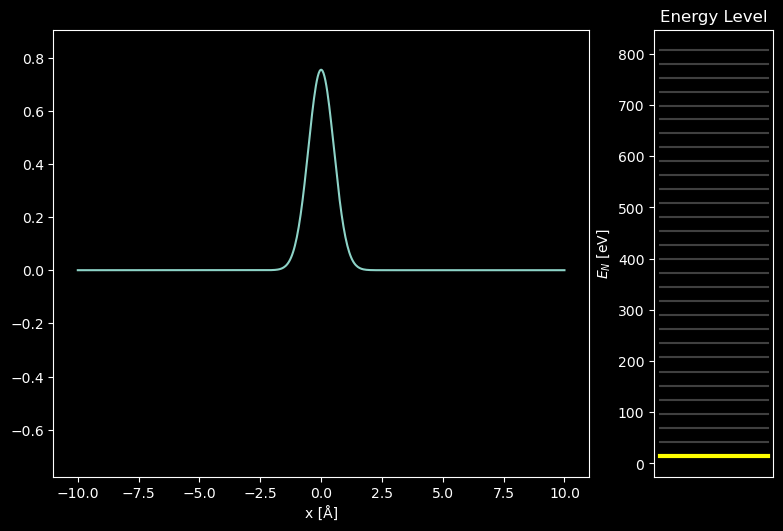

In [13]:
# Harmonic oscillator potential
def harmonic_oscillator(particle):
    k = 100 * eV / Å**2
    return 0.5 * k * particle.x**2

# Define the Hamiltonian
H = Hamiltonian(particles = SingleParticle(), potential = harmonic_oscillator, 
                spatial_ndim = 1, N = 512, extent = 20*Å)

#Diagonalize the Hamiltonian and compute the eigenstates
eigenstates = H.solve(max_states = 30)

# Print out the energies of the eigenstates
print(eigenstates.energies) # the printed energies are expressed in eV

# Visualize the Eigenstates
visualization = init_visualization(eigenstates)
visualization.plot_eigenstate(0)

Eigenstate:  1


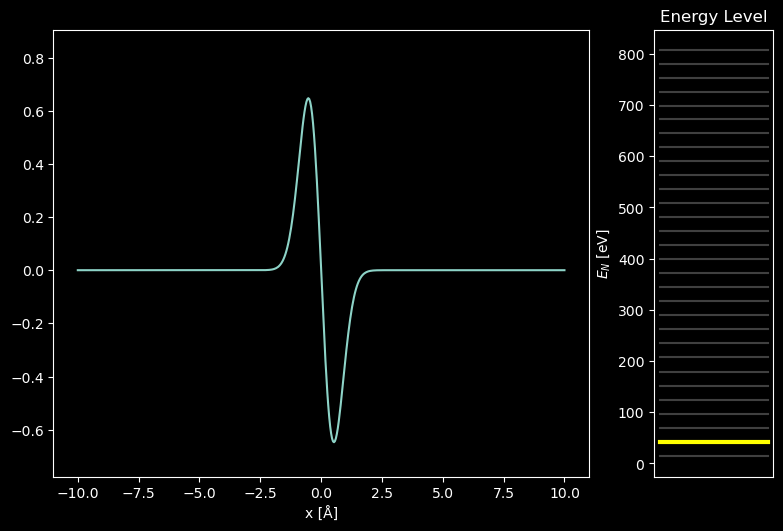

Eigenstate:  2


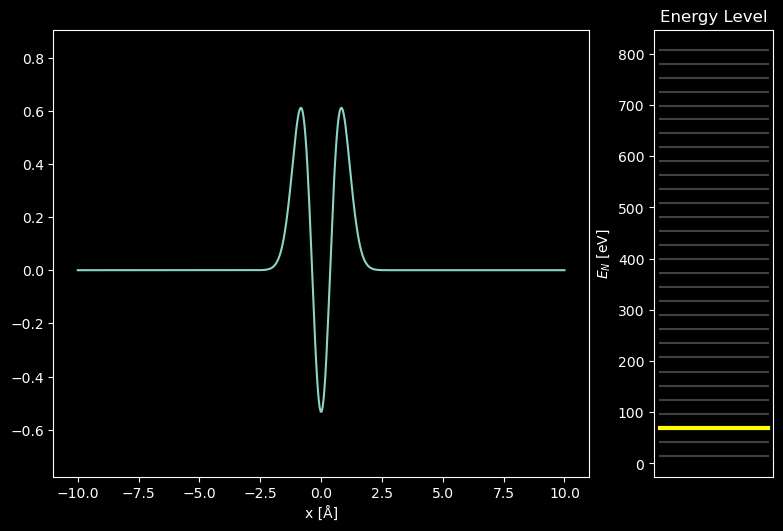

Eigenstate:  3


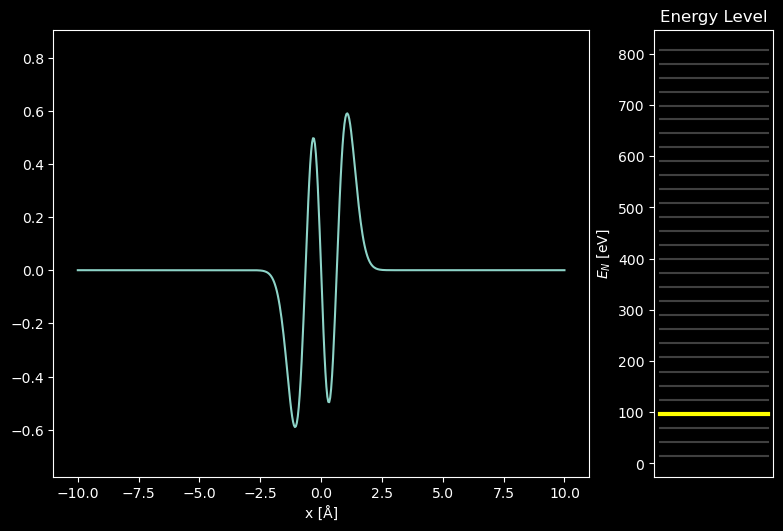

Eigenstate:  4


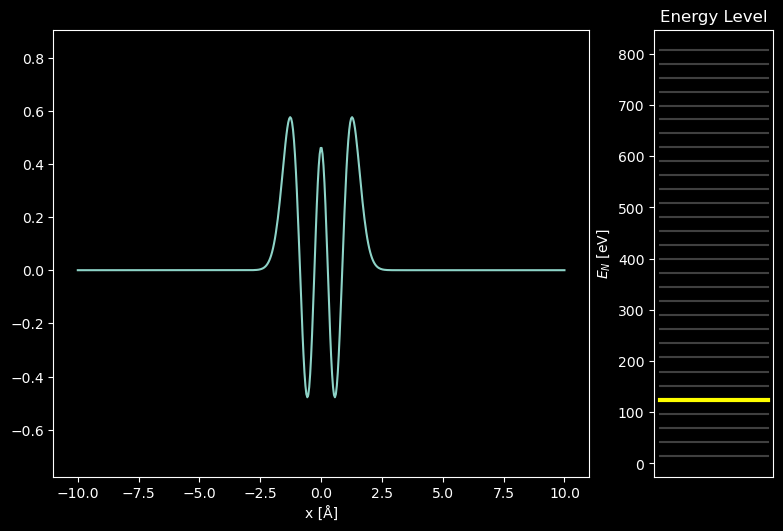

Eigenstate:  5


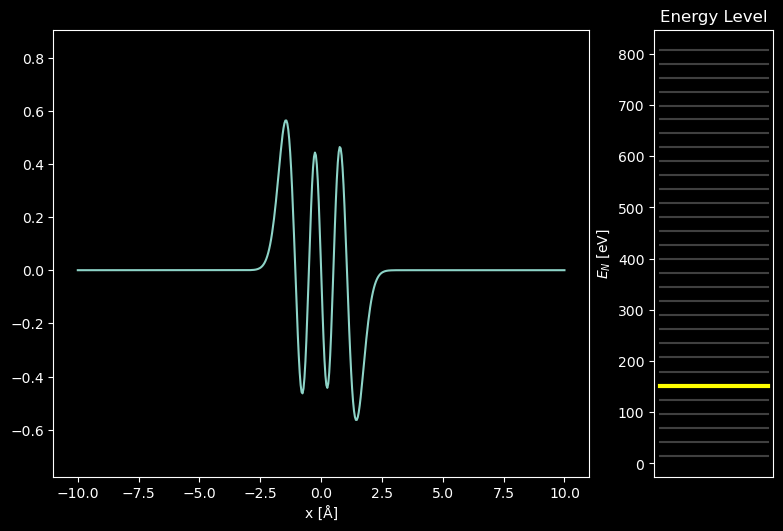

In [14]:
for i in range(1,6):
    print("Eigenstate: ",i)
    visualization.plot_eigenstate(i)

<ol start=5>
    <li>What is on the x-axis of your plots?</li>
    <li>Are your plots showing wave functions $\psi(x)$ or probability functions $\psi^*(x) \psi(x)$? How do you know?</li>
</ol>


### Question 5 Answer
The x-axis of these plots are the x values described by a particle or system's spatial position.

### Question 6 Answer
These plots are showing wave functions rather than described as probability functions. This is because if the plots were described by probability functions, there would only be non-negative values. The y-axis is showing positive and negative values of energy.

### New potential: infinite square well

Below I define the infinite square well potential and plot the two lowest-energy eigenstates (compare to Figure 6.3 in your textbook).

Computing...
Took 0.00600433349609375
[  0.58926935   2.35704264   5.30321556   9.4276143   14.7299955
  21.21004635  28.8673845   37.70155819  47.71204619  58.89825789
  71.2595333   84.79514311  99.50428872 115.3861023  132.43964681
 150.6639161  170.05783494 190.6202591  212.34997539 235.24570176
 259.30608737 284.52971266 310.91508944 338.46066097 367.16480207
 397.0258192  428.04195057 460.21136622 493.53216816 528.00239048]


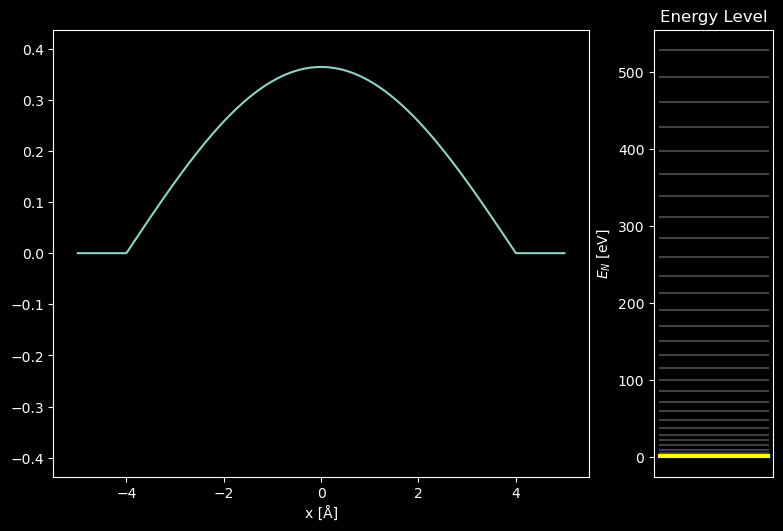

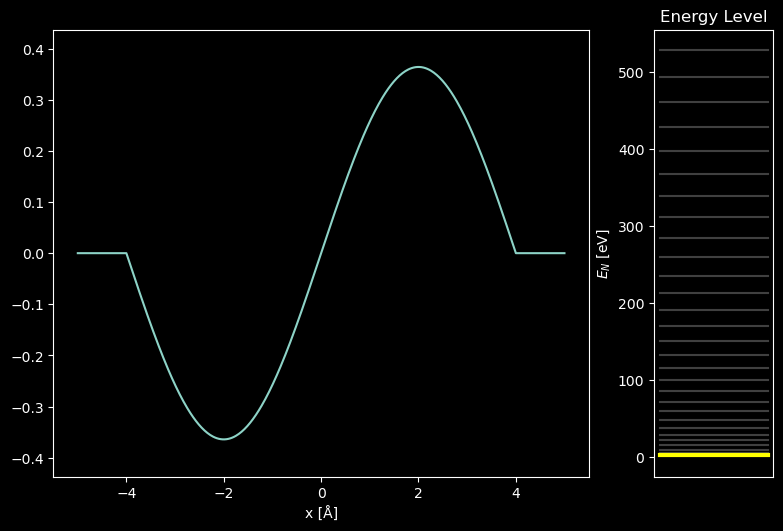

In [15]:
# 8 angstrom-wide infinite square well
def infinite_square_well(particle):
    potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 4*Å
    potential[out_of_bounds] = np.inf
    return potential

# Define the Hamiltonian of the infinite square well
H_sw = Hamiltonian(particles = SingleParticle(), potential = infinite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 10*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_sw = H_sw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the infinite square well eigenstates
visualization_sw = init_visualization(eigenstates_sw)
visualization_sw.plot_eigenstate(0)
visualization_sw.plot_eigenstate(1)

<ol start=7>
    <li>Plot any three infinite square well eigenstates of your choice.</li>
    <li>What property do the infinite square well eigenstates have that's different than the SHO eigenstates? (Hint: think about the properties of valid wave functions we discussed in class)</li>
    <li>What is the relationship between the number of extrema (maxima plus minima) in each eigenstate plot and the quantum number of the eigenstate?</li>
</ol>

Eigenstate:  5


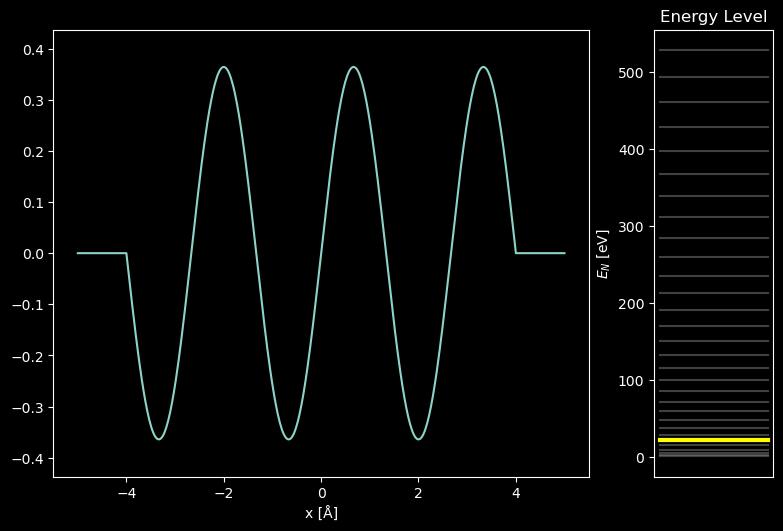

Eigenstate:  10


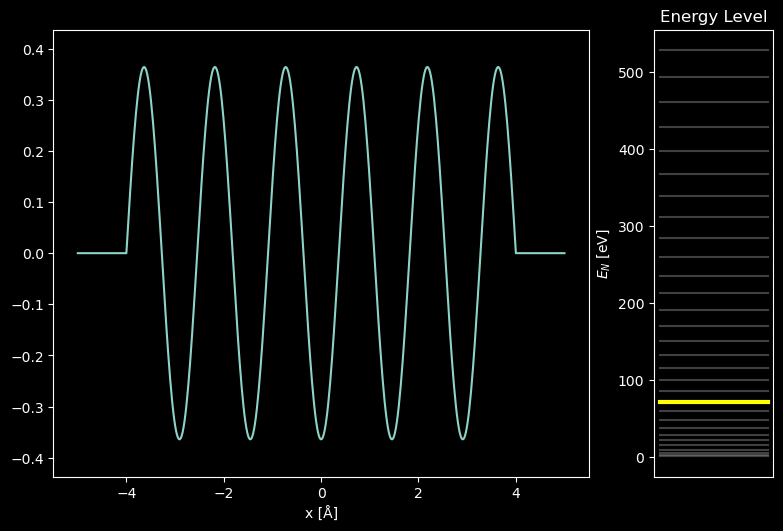

Eigenstate:  15


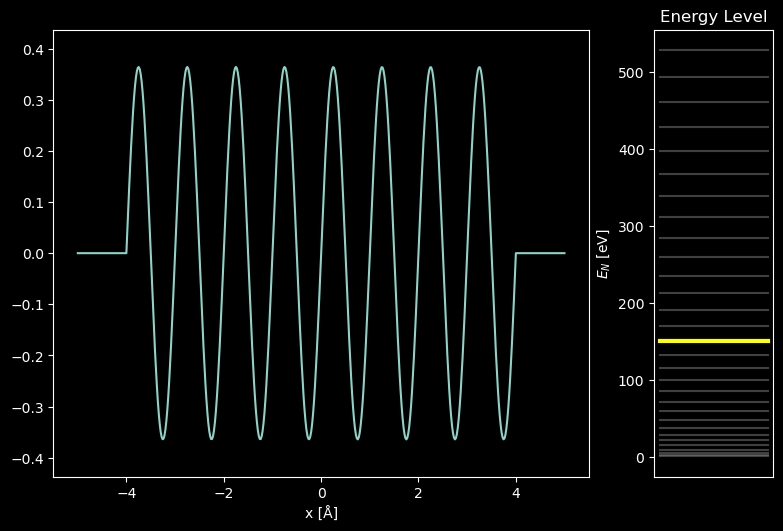

In [18]:
for i in [5,10,15]:
    print("Eigenstate: ",i)
    visualization_sw.plot_eigenstate(i)

### Question 8 Answer
Infinity square well eigenstates have energy levels that are not equidistant from each other, unlike the simple harmonic oscillator eigenstates. Infinity square well eigenstates are also confined within the well and cannot exist outside of the well, thus having a hard cut off position.

### Question 9 Answer
There appears to be a relationship of n+1 between the quantum number of the eigenstates and the total of minima and maxima points. There will always be +1 minima or maxima point than that of the quantum number.

### Now it's your turn to define a potential

<ol start=10>
    <li>Write a function that defines a <em>finite square-well</em> potential (textbook section 6.4). You can choose the width of the well in Angstroms and the potential at the walls in eV. Calculate the finite square-well Hamiltonian and plot any five eigenstates you choose.</li>
    <li>Based on your plots, do you think a particle can get out of the finite square-well potential no matter its quantum number $n$?</li>
</ol>

Computing...
Took 0.007007122039794922
[  0.87094073   3.47823461   7.80408901  13.81404295  21.4459211
  30.57946469  40.92011116  50.35125501  50.76524377  51.45292501
  53.00446521  53.76095472  56.55057456  57.48539114  61.01780917
  62.5640423   65.74197457  68.81314068  71.2101706   75.78821583
  78.39100828  82.77328746  86.88055742  90.36246952  95.84371772
  99.69557512 104.6731775  110.17704348 114.5347068  120.72734237]
Eigenstate:  2


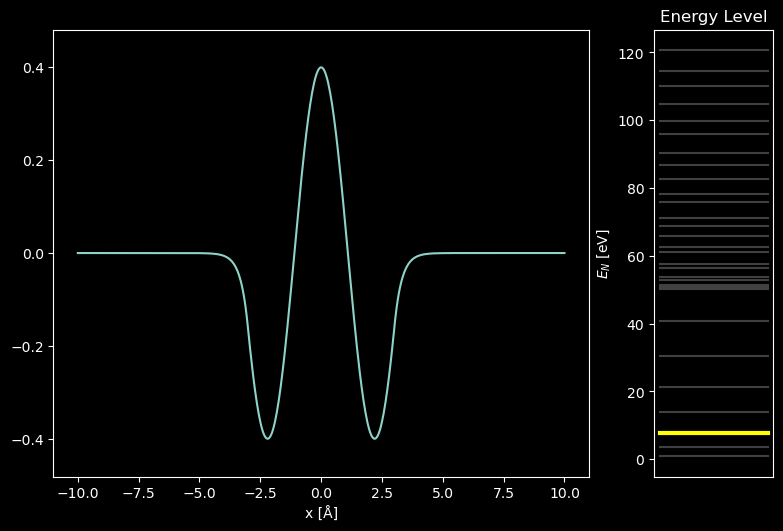

Eigenstate:  5


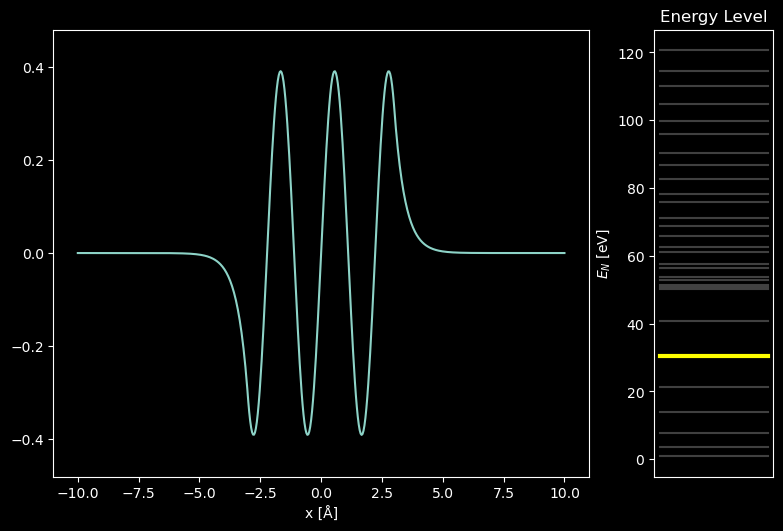

Eigenstate:  7


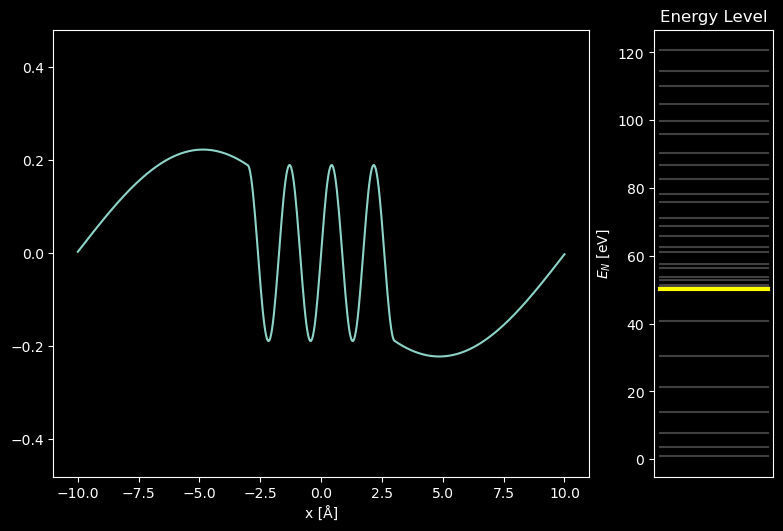

Eigenstate:  12


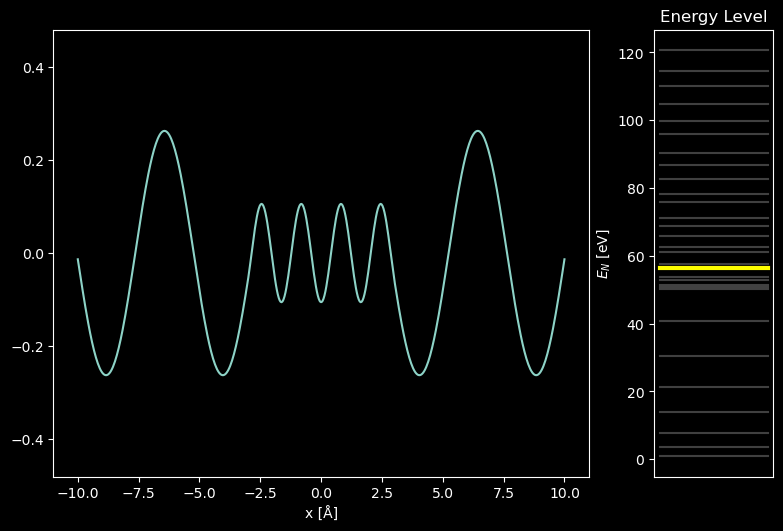

Eigenstate:  20


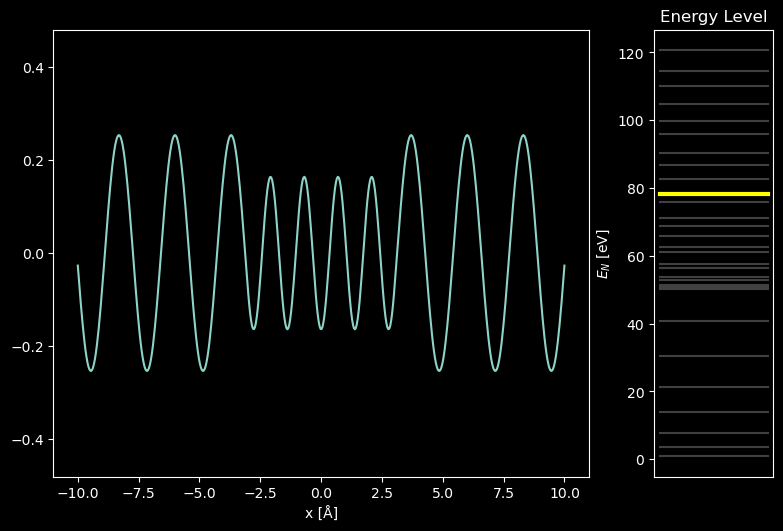

In [24]:
# 6 angstrom-wide finite square well
def finite_square_well(particle):
    potential = potential = np.zeros_like(particle.x)
    out_of_bounds = np.abs(particle.x) > 3*Å
    potential[out_of_bounds] = 50*eV
    return potential

# Define the Hamiltonian of the finite square well
H_fsw = Hamiltonian(particles = SingleParticle(), potential = finite_square_well, 
                   spatial_ndim = 1, N = 512, extent = 20*Å)

# Diagonalize the Hamiltonian and compute the eigenstates
eigenstates_fsw = H_fsw.solve(max_states = 30)

print(eigenstates_sw.energies)

# Visualize the finite square well eigenstates
visualization_fsw = init_visualization(eigenstates_fsw)
for i in [2,5,7,12,20]:
    print("Eigenstate: ",i)
    visualization_fsw.plot_eigenstate(i)

### Question 11 Answer
The particle can escape the finite square well only when the energy level surpasses 50eV, which seems to be around quantum number 7, thus the quantum number does matter depending on how high the potential barrier is.